In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
test_file_path = '/content/drive/MyDrive/loan_prediction_kaggle/test.csv'
testData = pd.read_csv(test_file_path)
train_file_path= '/content/drive/MyDrive/loan_prediction_kaggle/train.csv'
trainData = pd.read_csv(train_file_path)
testData.shape,trainData.shape

((39098, 12), (58645, 13))

In [3]:
trainData.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
testData.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [5]:
trainData.columns,testData.columns

(Index(['id', 'person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
        'cb_person_cred_hist_length', 'loan_status'],
       dtype='object'),
 Index(['id', 'person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
        'cb_person_cred_hist_length'],
       dtype='object'))

In [6]:
y_train=trainData['loan_status']
x_train=trainData.drop('loan_status',axis=1)
x_test=testData

In [7]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(58645,)
(58645, 12)
(39098, 12)


In [8]:
# to verify that the length of the features of x_test is equal to  the features of x_train
features_test=list(x_test.columns)
features_train=list(x_train.columns)
print(len(features_test)==len(features_train))

True


In [9]:
# to verify that the features of x_test matches the features of x_train
for i in range(len(features_test)):
  if features_test[i]!=features_train[i]:
    print(False)





In [10]:
x_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [12]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [13]:
categorical_features=x_train.select_dtypes(include=['object']).columns
numerical_features=x_train.select_dtypes(exclude=['object']).columns

In [14]:
categorical_features

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [15]:
numerical_features

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [16]:
#verifying if the ids of x_test are different , samething for x_test

if x_test['id'].is_unique:
    print(" all the IDs are different  ")

 all the IDs are different  


In [17]:
# keeping the ids of the x_test, but we don't need those of x_train
x_train=x_train.drop(columns=['id'])
x_test_id=x_test['id']
x_test=x_test.drop(columns=['id'])
x_test
numerical_features=list(numerical_features)
numerical_features.remove('id')
numerical_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Basic info about the target
print("Target value counts:")
print(trainData['loan_status'].value_counts())
print("\nTarget class proportions:")
print(trainData['loan_status'].value_counts(normalize=True))




Target value counts:
loan_status
0    50295
1     8350
Name: count, dtype: int64

Target class proportions:
loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


/tmp/ipython-input-2439430137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=trainData, palette='Set2')


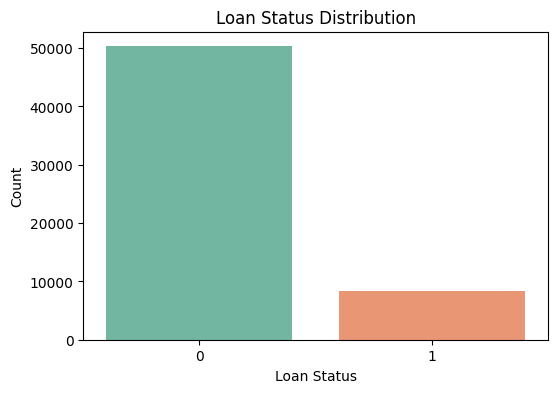

In [19]:
# 2. Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=trainData, palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()



In [20]:
# 3. Check for imbalance
imbalance_ratio = trainData['loan_status'].value_counts(normalize=True).max()
print(f"\nImbalance ratio (majority class proportion): {imbalance_ratio:.2f}")




Imbalance ratio (majority class proportion): 0.86


In [21]:
# 4. Grouped stats by target
grouped = trainData.groupby('loan_status').mean(numeric_only=True)
print("\nMean values of numerical features by loan status:")
print(grouped)




Mean values of numerical features by loan status:
                       id  person_age  person_income  person_emp_length  \
loan_status                                                               
0            29378.138682   27.553634   66672.867720           4.863048   
1            28983.856886   27.534132   48224.661796           3.725030   

                loan_amnt  loan_int_rate  loan_percent_income  \
loan_status                                                     
0             8888.883229      10.258767             0.145105   
1            11197.271856      13.202305             0.244363   

             cb_person_cred_hist_length  
loan_status                              
0                              5.818531  
1                              5.783593  


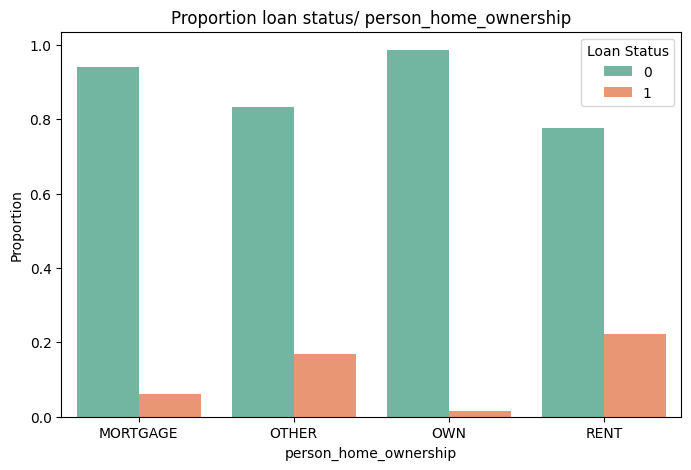

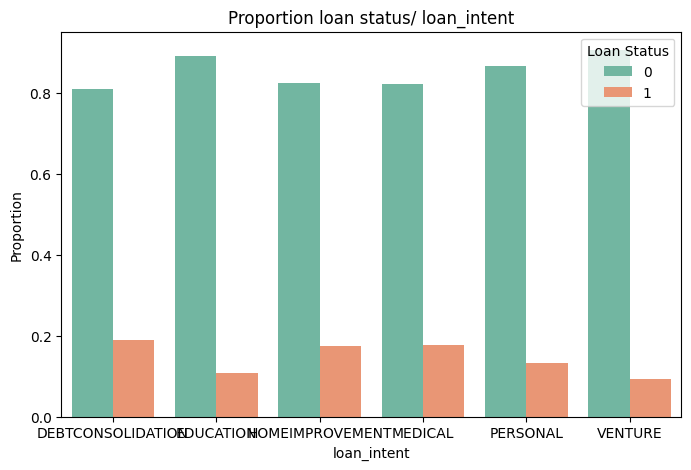

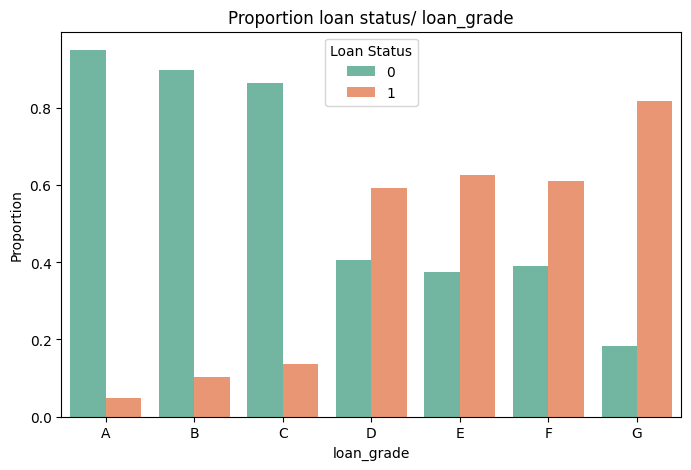

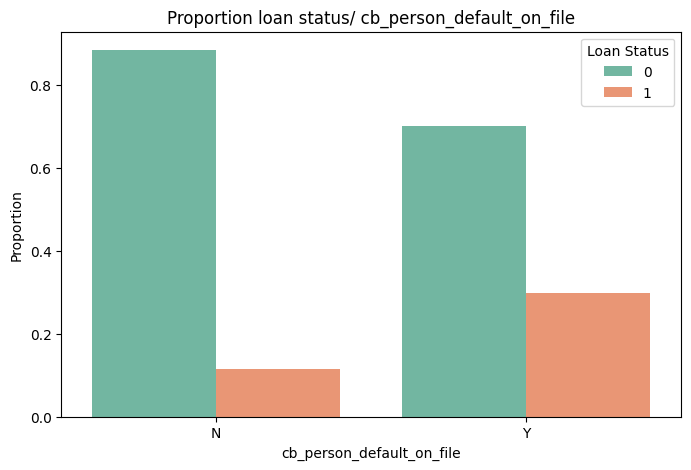

In [22]:


# Exemple pour 'loan_grade'
for cat_feature in categorical_features:
  prop_df = trainData.groupby(cat_feature)['loan_status'].value_counts(normalize=True).rename('proportion').reset_index()
  plt.figure(figsize=(8,5))
  sns.barplot(x=cat_feature, y='proportion', hue='loan_status', data=prop_df, palette='Set2')
  plt.title(f'Proportion loan status/ {cat_feature}')
  plt.ylabel('Proportion')
  plt.xlabel(cat_feature)
  plt.legend(title='Loan Status')
  plt.show()




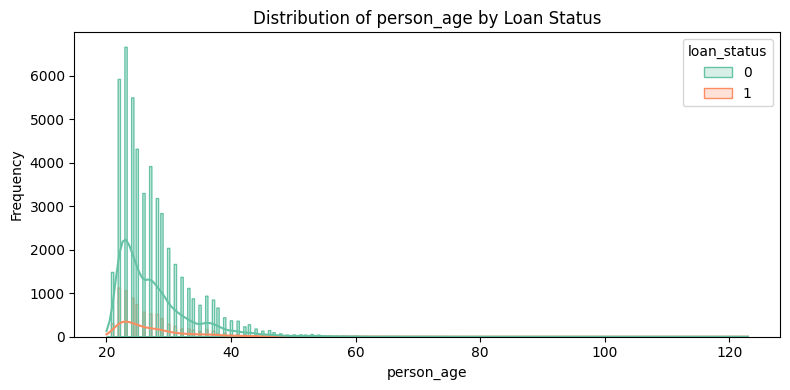

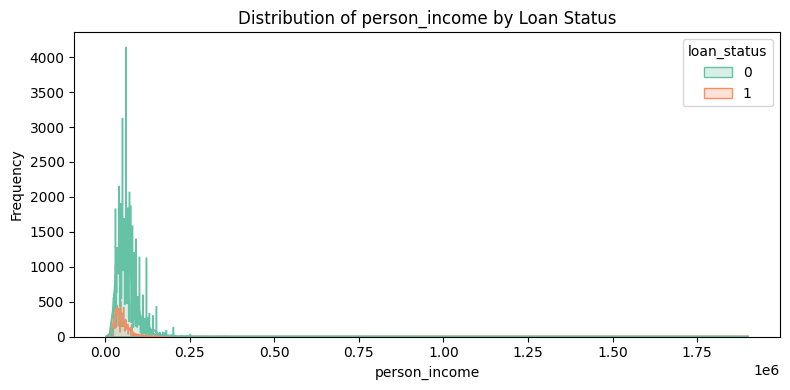

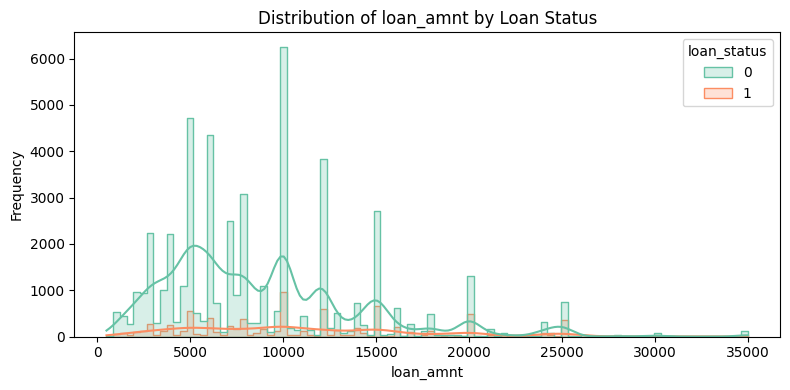

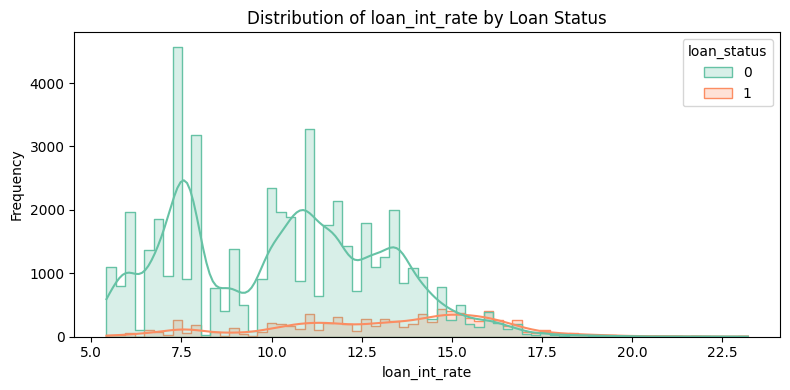

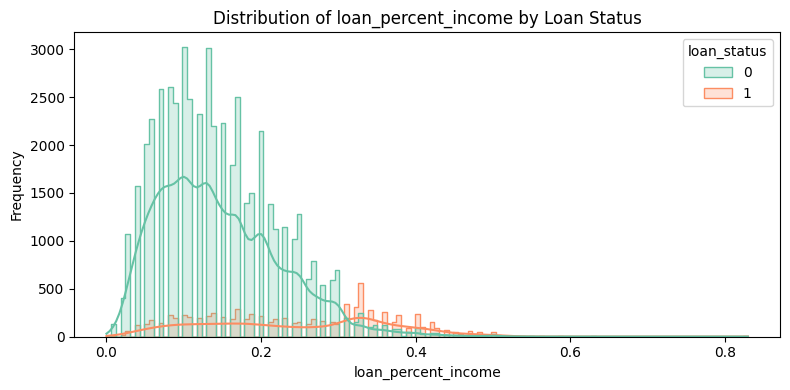

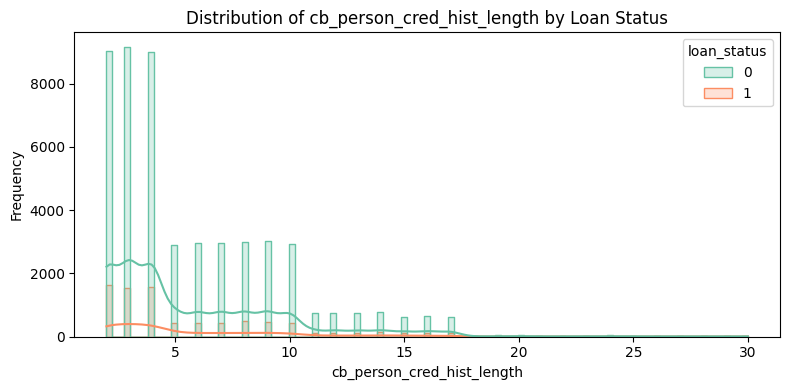

In [23]:
# numerical features analysis



numerical_features = [
    'person_age', 'person_income', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=trainData, x=feature, hue='loan_status', kde=True, element='step', palette='Set2')
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


#Features ingeneering for logistic regression

*   One hot encoding for categorical nominal features
*   Mapping encoding for categorical ordinal features
*   Adding features








###One hot encoding for categorical nominal features

In [24]:
#encoding categorical features
x_train_logistic=x_train.copy()
x_test_logistic=x_test.copy()

nominal_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on x_train
encoded_train = encoder.fit_transform(x_train_logistic[nominal_features])

# Transform x_test using the fitted encoder
encoded_test = encoder.transform(x_test_logistic[nominal_features])

# Convert the encoded arrays back to DataFrames
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(nominal_features))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(nominal_features))

# Drop the original categorical columns from x_train and x_test
x_train_logistic = x_train_logistic.drop(columns=nominal_features)
x_test_logistic= x_test_logistic.drop(columns=nominal_features)

# Concatenate the encoded columns with the rest of the DataFrame
x_train_logistic = pd.concat([x_train_logistic, encoded_train_df], axis=1)
x_test_logistic = pd.concat([x_test_logistic, encoded_test_df], axis=1)


encoded_train_df.index = x_train_logistic.index
encoded_test_df.index = x_test_logistic.index



###Mapping encoding for categorical ordinal features

In [25]:
ordinal_features = ['loan_grade']
ordinal_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

for df in [x_train_logistic, x_test_logistic]:
    df['loan_grade_encoded'] = df['loan_grade'].map(ordinal_mapping)

x_train_logistic= x_train_logistic.drop(columns=ordinal_features)
x_test_logistic = x_test_logistic.drop(columns=ordinal_features)






###Adding features relating

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# =========================
# 1️⃣ Ajouter age²
# =========================
x_train_logistic['age_squared'] = x_train_logistic['person_age'] ** 2
x_test_logistic['age_squared'] = x_test_logistic['person_age'] ** 2

# =========================
# 2️⃣ Ajouter age_bins
# =========================
bins = [0, 25, 35, 50, 65, 120]
labels = ["18-25", "26-35", "36-50", "51-65", "65+"]
x_train_logistic['age_bins'] = pd.cut(x_train_logistic['person_age'], bins=bins, labels=labels)
x_test_logistic['age_bins'] = pd.cut(x_test_logistic['person_age'], bins=bins, labels=labels)

# =========================
# 3️⃣ OneHotEncoder sur age_bins
# =========================
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fitting sur train
encoded_train = encoder.fit_transform(x_train_logistic[['age_bins']])
encoded_test = encoder.transform(x_test_logistic[['age_bins']])

# Convertir en DataFrame avec le bon index
encoded_train_df = pd.DataFrame(encoded_train,
                                columns=encoder.get_feature_names_out(['age_bins']),
                                index=x_train_logistic.index)

encoded_test_df = pd.DataFrame(encoded_test,
                               columns=encoder.get_feature_names_out(['age_bins']),
                               index=x_test_logistic.index)

# Supprimer la colonne originale et concaténer
x_train_logistic = x_train_logistic.drop(columns=['age_bins'])
x_test_logistic = x_test_logistic.drop(columns=['age_bins'])

x_train_logistic = pd.concat([x_train_logistic, encoded_train_df], axis=1)
x_test_logistic = pd.concat([x_test_logistic, encoded_test_df], axis=1)

print("x_train_logistic shape:", x_train_logistic.shape)
print("x_test_logistic shape:", x_test_logistic.shape)


x_train_logistic shape: (58645, 27)
x_test_logistic shape: (39098, 27)


In [27]:
import numpy as np
import pandas as pd

# Créer une fonction pour safe feature engineering
def add_features(df):
    df = df.copy()

    # log_income
    if 'person_income' in df.columns:
        df['log_income'] = np.log1p(df['person_income'])

    # loan_to_income
    if all(col in df.columns for col in ['loan_amnt', 'person_income']):
        df['loan_to_income'] = df['loan_amnt'] / df['person_income']

    # loan_cost
    if all(col in df.columns for col in ['loan_amnt', 'loan_int_rate']):
        df['loan_cost'] = df['loan_amnt'] * df['loan_int_rate']

    # cred_hist_ratio
    if all(col in df.columns for col in ['cb_person_cred_hist_length', 'person_age']):
        df['cred_hist_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']

    # high_loan_ratio
    if 'loan_percent_income' in df.columns:
        df['high_loan_ratio'] = (df['loan_percent_income'] > 0.3).astype(int)

    # emp_length bin
    if 'person_emp_length' in df.columns:
        bins_emp = [-1, 1, 5, 10, 50]
        labels_emp = ["0-1", "2-5", "6-10", "10+"]
        df['emp_length_bin'] = pd.cut(df['person_emp_length'], bins=bins_emp, labels=labels_emp)

    # loan_grade ordinal + subprime
    if 'loan_grade' in df.columns:
        grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
        df['loan_grade_num'] = df['loan_grade'].map(grade_map)
        df['is_subprime'] = (df['loan_grade_num'] >= 4).astype(int)

    return df

# Appliquer aux datasets
x_train_logistic = add_features(x_train_logistic)
x_test_logistic = add_features(x_test_logistic)




In [28]:
# Convertir emp_length_bin en string pour l'encoder
x_train_logistic['emp_length_bin'] = x_train_logistic['emp_length_bin'].astype(str)
x_test_logistic['emp_length_bin'] = x_test_logistic['emp_length_bin'].astype(str)

# Maintenant on peut encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit sur train
encoded_train = encoder.fit_transform(x_train_logistic[['emp_length_bin']])
encoded_test = encoder.transform(x_test_logistic[['emp_length_bin']])

# Convertir en DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['emp_length_bin']), index=x_train_logistic.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['emp_length_bin']), index=x_test_logistic.index)

# Supprimer la colonne originale et concaténer
x_train_logistic = x_train_logistic.drop(columns=['emp_length_bin'])
x_test_logistic = x_test_logistic.drop(columns=['emp_length_bin'])

x_train_logistic = pd.concat([x_train_logistic, encoded_train_df], axis=1)
x_test_logistic = pd.concat([x_test_logistic, encoded_test_df], axis=1)


In [29]:
print(x_train_logistic.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      58645 non-null  int64  
 1   person_income                   58645 non-null  int64  
 2   person_emp_length               58645 non-null  float64
 3   loan_amnt                       58645 non-null  int64  
 4   loan_int_rate                   58645 non-null  float64
 5   loan_percent_income             58645 non-null  float64
 6   cb_person_cred_hist_length      58645 non-null  int64  
 7   person_home_ownership_MORTGAGE  58645 non-null  float64
 8   person_home_ownership_OTHER     58645 non-null  float64
 9   person_home_ownership_OWN       58645 non-null  float64
 10  person_home_ownership_RENT      58645 non-null  float64
 11  loan_intent_DEBTCONSOLIDATION   58645 non-null  float64
 12  loan_intent_EDUCATION           

#Feature engineering pour catboost

In [30]:
x_train_catboost=x_train.copy()
x_test_catboost=x_test.copy()

# financial ratio
x_train_catboost["loan_to_income"] = x_train_catboost["loan_amnt"] / (x_train_catboost["person_income"] + 1)
x_test_catboost["loan_to_income"] = x_test_catboost["loan_amnt"] / (x_test_catboost["person_income"] + 1)

x_train_catboost["installment_to_income"] = x_train_catboost["loan_int_rate"] / (x_train_catboost["person_income"] + 1)
x_test_catboost["installment_to_income"] = x_test_catboost["loan_int_rate"] / (x_test_catboost["person_income"] + 1)

# 2. Log-transform
x_train_catboost["log_income"] = np.log1p(x_train_catboost["person_income"])
x_test_catboost["log_income"] = np.log1p(x_test_catboost["person_income"])

x_train_catboost["log_loan_amnt"] = np.log1p(x_train_catboost["loan_amnt"])
x_test_catboost["log_loan_amnt"] = np.log1p(x_test_catboost["loan_amnt"])

# 3. Interactions
if "emp_length" in x_train_catboost.columns:
    x_train_catboost["income_times_employment"] = x_train_catboost["person_income"] * x_train_catboost["emp_length"]
    x_test_catboost["income_times_employment"] = x_test_catboost["person_income"] * x_test_catboost["emp_length"]

if "cb_person_cred_hist_length" in x_train_catboost.columns:
    x_train_catboost["loan_int_rate_times_credit_hist"] = (
        x_train_catboost["loan_int_rate"] * x_train_catboost["cb_person_cred_hist_length"]
    )
    x_test_catboost["loan_int_rate_times_credit_hist"] = (
        x_test_catboost["loan_int_rate"] * x_test_catboost["cb_person_cred_hist_length"]
    )


x_train_catboost["age_bin"] = pd.cut(
    x_train_catboost["person_age"], bins=[18,25,35,50,65,100],
    labels=["18-25","26-35","36-50","51-65","65+"]
)
x_test_catboost["age_bin"] = pd.cut(
    x_test_catboost["person_age"], bins=[18,25,35,50,65,100],
    labels=["18-25","26-35","36-50","51-65","65+"]
)




In [31]:
print(x_train_catboost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   person_age                       58645 non-null  int64   
 1   person_income                    58645 non-null  int64   
 2   person_home_ownership            58645 non-null  object  
 3   person_emp_length                58645 non-null  float64 
 4   loan_intent                      58645 non-null  object  
 5   loan_grade                       58645 non-null  object  
 6   loan_amnt                        58645 non-null  int64   
 7   loan_int_rate                    58645 non-null  float64 
 8   loan_percent_income              58645 non-null  float64 
 9   cb_person_default_on_file        58645 non-null  object  
 10  cb_person_cred_hist_length       58645 non-null  int64   
 11  loan_to_income                   58645 non-null  float64 
 12  inst

#Feature engineering for RandomForest

In [32]:

x_train_forest=x_train.copy()
x_test_forest=x_test.copy()


# Initialize the OneHotEncoder
encoder_forest = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the encoder on x_train
encoded_train_forest= encoder_forest.fit_transform(x_train_forest[nominal_features])

# Transform x_test using the fitted encoder
encoded_test_forest = encoder_forest.transform(x_test_forest[nominal_features])

# Convert the encoded arrays back to DataFrames
encoded_train_df_forest = pd.DataFrame(encoded_train_forest, columns=encoder_forest.get_feature_names_out(nominal_features))
encoded_test_df_forest = pd.DataFrame(encoded_test_forest, columns=encoder_forest.get_feature_names_out(nominal_features))

# Drop the original categorical columns from x_train and x_test
x_train_forest = x_train_forest.drop(columns=nominal_features)
x_test_forest= x_test_forest.drop(columns=nominal_features)

# Concatenate the encoded columns with the rest of the DataFrame
x_train_forest = pd.concat([x_train_forest, encoded_train_df_forest], axis=1)
x_test_forest = pd.concat([x_test_forest, encoded_test_df_forest], axis=1)


encoded_train_df_forest.index = x_train_forest.index
encoded_test_df_forest.index = x_test_forest.index


for df in [x_train_forest, x_test_forest]:
    df['loan_grade_encoded'] = df['loan_grade'].map(ordinal_mapping)

x_train_forest= x_train_forest.drop(columns=ordinal_features)
x_test_forest= x_test_forest.drop(columns=ordinal_features)




x_train_forest["loan_to_income_ratio"] = x_train_forest["loan_amnt"] / (x_train_forest["person_income"] + 1)
x_test_forest["loan_to_income_ratio"] = x_test_forest["loan_amnt"] / (x_test_forest["person_income"] + 1)


x_train_forest["age_to_loan_ratio"] = x_train_forest["person_age"] / (x_train_forest["loan_amnt"] + 1)
x_test_forest["age_to_loan_ratio"] = x_test_forest["person_age"] / (x_test_forest["loan_amnt"] + 1)





x_train_forest["heavy_loan_flag"] = (x_train_forest["loan_amnt"] > x_train_forest["person_income"] * 0.5).astype(int)
x_test_forest["heavy_loan_flag"] = (x_test_forest["loan_amnt"] > x_test_forest["person_income"] * 0.5).astype(int)


for col in x_train_forest.columns:
    if x_train_forest[col].isnull().sum() > 0:
        if x_train_forest[col].dtype in ["int64", "float64"]:
            median_val = x_train_forest[col].median()
            x_train_forest[col].fillna(median_val, inplace=True)
            x_test_forest[col].fillna(median_val, inplace=True)
        else:
            mode_val = x_train_forest[col].mode()[0]
            x_train_forest[col].fillna(mode_val, inplace=True)
            x_test_forest[col].fillna(mode_val, inplace=True)




##We will do a stacking combining models that uses different encoding


logistic regression (the meta model)

Random Forest

Gradient Boosting

CatBoost

*****warning: we have to use cross validation for the meta features



In [33]:
pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [34]:
x_train_catboost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   person_age                       58645 non-null  int64   
 1   person_income                    58645 non-null  int64   
 2   person_home_ownership            58645 non-null  object  
 3   person_emp_length                58645 non-null  float64 
 4   loan_intent                      58645 non-null  object  
 5   loan_grade                       58645 non-null  object  
 6   loan_amnt                        58645 non-null  int64   
 7   loan_int_rate                    58645 non-null  float64 
 8   loan_percent_income              58645 non-null  float64 
 9   cb_person_default_on_file        58645 non-null  object  
 10  cb_person_cred_hist_length       58645 non-null  int64   
 11  loan_to_income                   58645 non-null  float64 
 12  inst

In [35]:
# 1) Détecter les colonnes catégorielles
cat_features = x_train_catboost.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colonnes catégorielles :", cat_features)

# 2) Forcer en string + remplacer NaN par "missing"
for c in cat_features:
    x_train_catboost[c] = x_train_catboost[c].astype(str).fillna("missing")
    x_test_catboost[c]  = x_test_catboost[c].astype(str).fillna("missing")




Colonnes catégorielles : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'age_bin']


In [36]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np
cat_features = x_train_catboost.select_dtypes(include=['object', 'category']).columns.tolist()
# ================================
# 1. Initialiser les modèles
# ================================
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5,
                          subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric="logloss")
cat_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6,
                               eval_metric='AUC', random_state=42, verbose=0)

meta_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# ================================
# 2. Préparation stacking
# ================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

oof_preds = np.zeros((x_train.shape[0], 4))   # 4 modèles de base
test_preds = np.zeros((x_test.shape[0], 4))

# ================================
# 3. Cross-validation pour meta-features
# ================================
for fold, (train_idx, val_idx) in enumerate(kf.split(x_train)):
    print(f"\n---- Fold {fold+1} ----")

    # Splits locaux
    X_tr_rf, X_val_rf = x_train_forest.iloc[train_idx], x_train_forest.iloc[val_idx]
    X_tr_gb, X_val_gb = x_train_forest.iloc[train_idx], x_train_forest.iloc[val_idx]  # même features que RF
    X_tr_xgb, X_val_xgb = x_train_forest.iloc[train_idx], x_train_forest.iloc[val_idx]  # idem
    X_tr_cat, X_val_cat = x_train_catboost.iloc[train_idx], x_train_catboost.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Random Forest
    rf_model.fit(X_tr_rf, y_tr)
    oof_preds[val_idx, 0] = rf_model.predict_proba(X_val_rf)[:, 1]
    test_preds[:, 0] += rf_model.predict_proba(x_test_forest)[:, 1] / kf.n_splits

    # Gradient Boosting
    gb_model.fit(X_tr_gb, y_tr)
    oof_preds[val_idx, 1] = gb_model.predict_proba(X_val_gb)[:, 1]
    test_preds[:, 1] += gb_model.predict_proba(x_test_forest)[:, 1] / kf.n_splits

    # XGBoost
    xgb_model.fit(X_tr_xgb, y_tr)
    oof_preds[val_idx, 2] = xgb_model.predict_proba(X_val_xgb)[:, 1]
    test_preds[:, 2] += xgb_model.predict_proba(x_test_forest)[:, 1] / kf.n_splits

    # CatBoost
    cat_model.fit(X_tr_cat, y_tr, cat_features=cat_features, verbose=0)
    oof_preds[val_idx, 3] = cat_model.predict_proba(X_val_cat)[:, 1]
    test_preds[:, 3] += cat_model.predict_proba(x_test_catboost)[:, 1] / kf.n_splits

# ================================
# 4. Entraîner le méta-modèle
# ================================
meta_model.fit(oof_preds, y_train)

# ================================
# 5. Prédictions finales
# ================================
y_pred_proba = meta_model.predict_proba(test_preds)[:, 1]





---- Fold 1 ----


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



---- Fold 2 ----


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:27:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



---- Fold 3 ----


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:29:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



---- Fold 4 ----


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:31:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



---- Fold 5 ----


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:33:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
import pandas as pd
import os

df = pd.DataFrame({'id':x_test_id,'loan_status': y_pred_proba
})
df.to_csv("predictionStacking.csv", index=False)
print("Fichier 'predictionStacking.csv' créé dans le dossier courant.")

Fichier 'predictionStacking.csv' créé dans le dossier courant.


In [38]:
from google.colab import files
files.download('predictionStacking.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>